In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.linear_model as lm
from scipy import stats

In [4]:
ev_csv_file = "../Ev Project 1/combinedfiles.csv"
combined_data_df = pd.read_csv(ev_csv_file)

combined_data_df


,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown Fuel
0,2022,Alabama,8700,4400,50800,48100,449800,100,100,0,0,4077100,126100,30300
1,2022,Alaska,2000,700,9000,8700,48600,0,0,0,0,457100,30500,5500
2,2022,Arizona,65800,20400,150800,61200,446000,600,800,0,0,5476100,198700,70100
3,2022,Arkansas,5100,2500,30600,33300,283900,200,0,0,0,2229500,89700,10600
4,2022,California,903600,361100,1514000,183900,1338000,10300,1500,14900,0,31059000,725300,8200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021,Washington,66800,24300,240000,59000,359700,600,100,0,0,5792000,283600,64400
360,2021,West Virginia,1000,1000,14500,13900,129800,200,0,0,0,1268300,46100,10900
361,2021,Wisconsin,9300,7700,93500,39800,556500,700,100,0,0,4639100,143300,29900
362,2021,Wyoming,500,400,5700,17100,59400,100,0,0,0,482400,62100,15600


In [5]:
reduced_registration_data_df = combined_data_df[[
    "Year",
    "State",	
    "Electric (EV)",	
    "Plug-In Hybrid Electric (PHEV)",
    "Hybrid Electric (HEV)",
    "Gasoline",	
    "Diesel"]]

reduced_registration_data_df


,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Gasoline,Diesel
0,2022,Alabama,8700,4400,50800,4077100,126100
1,2022,Alaska,2000,700,9000,457100,30500
2,2022,Arizona,65800,20400,150800,5476100,198700
3,2022,Arkansas,5100,2500,30600,2229500,89700
4,2022,California,903600,361100,1514000,31059000,725300
...,...,...,...,...,...,...,...
359,2021,Washington,66800,24300,240000,5792000,283600
360,2021,West Virginia,1000,1000,14500,1268300,46100
361,2021,Wisconsin,9300,7700,93500,4639100,143300
362,2021,Wyoming,500,400,5700,482400,62100


In [6]:
year_2022_data = reduced_registration_data_df[reduced_registration_data_df["Year"] == 2022]
year_2022_data.head()

,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Gasoline,Diesel
0,2022,Alabama,8700,4400,50800,4077100,126100
1,2022,Alaska,2000,700,9000,457100,30500
2,2022,Arizona,65800,20400,150800,5476100,198700
3,2022,Arkansas,5100,2500,30600,2229500,89700
4,2022,California,903600,361100,1514000,31059000,725300


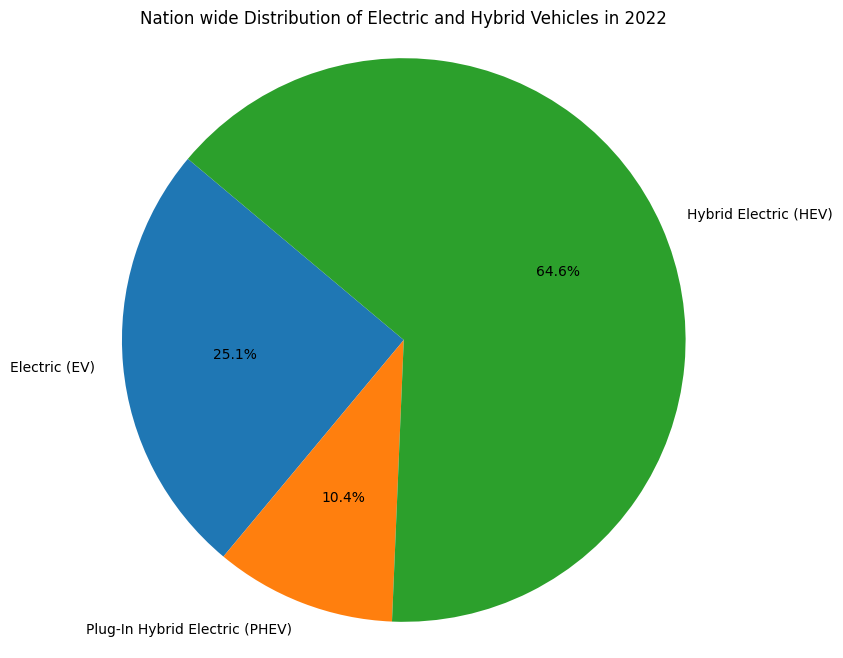

In [7]:
vehicle_type_columns = ['Electric (EV)', 'Plug-In Hybrid Electric (PHEV)', 'Hybrid Electric (HEV)']

# Sum the values for each vehicle type
vehicle_type_sums = year_2022_data[vehicle_type_columns].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(vehicle_type_sums, labels=vehicle_type_sums.index, autopct='%1.1f%%', startangle=140)
plt.title('Nation wide Distribution of Electric and Hybrid Vehicles in 2022')

plt.axis('equal')  
plt.show()

In [8]:
california_2022 = reduced_registration_data_df[(reduced_registration_data_df["State"] == "California") & (reduced_registration_data_df["Year"] == 2022)]
california_2022

,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Gasoline,Diesel
4,2022,California,903600,361100,1514000,31059000,725300


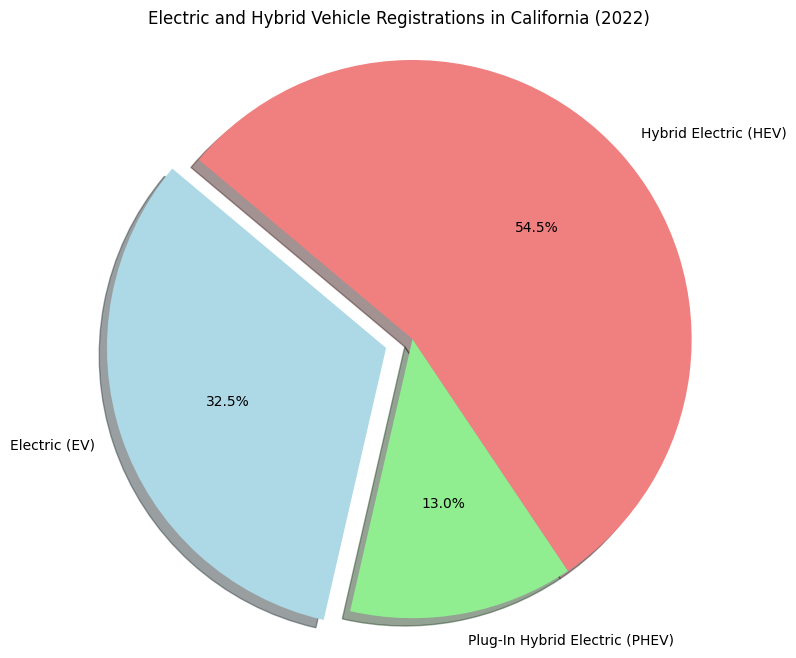

In [9]:
import matplotlib.pyplot as plt

# Data
labels = ['Electric (EV)', 'Plug-In Hybrid Electric (PHEV)', 'Hybrid Electric (HEV)']
sizes = [903600, 361100, 1514000]
colors = ['lightblue', 'lightgreen', 'lightcoral']
explode = (0.1, 0, 0)  # Explode the first slice (Electric (EV))

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Electric and Hybrid Vehicle Registrations in California (2022)')
plt.show()




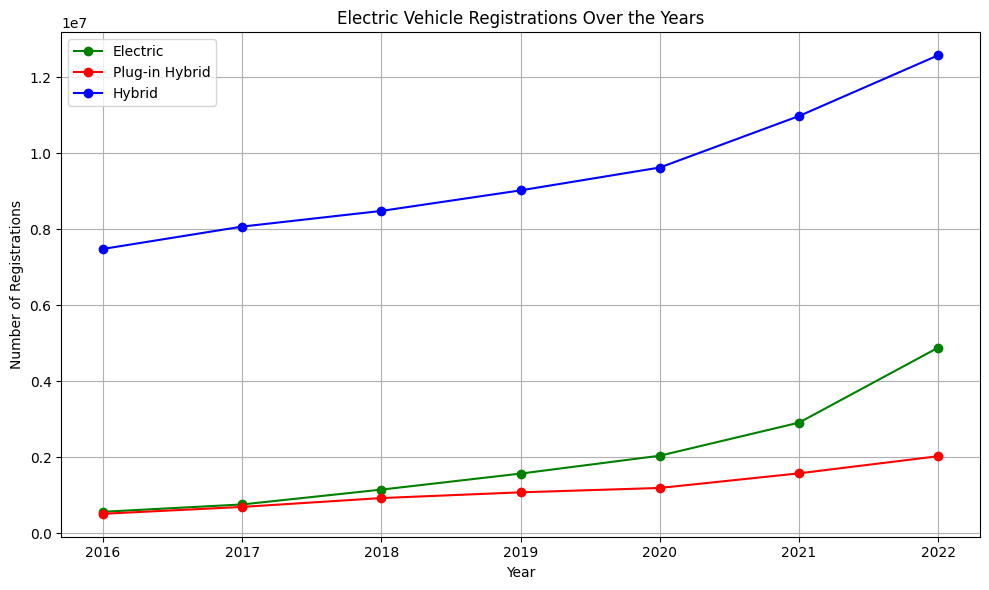

In [10]:
ev_registrations = reduced_registration_data_df.groupby('Year')['Electric (EV)'].sum()
phev_registrations = reduced_registration_data_df.groupby('Year')['Plug-In Hybrid Electric (PHEV)'].sum()
hev_registrations = reduced_registration_data_df.groupby('Year')['Hybrid Electric (HEV)'].sum()

plt.figure(figsize=(10, 6))
plt.plot(ev_registrations.index, ev_registrations.values, marker='o', color='green',label='Electric')
plt.plot(phev_registrations.index, phev_registrations.values, marker='o', color='red',label= 'Plug-in Hybrid')
plt.plot(hev_registrations.index, hev_registrations.values, marker='o', color='blue',label='Hybrid')
plt.plot

plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.title('Electric Vehicle Registrations Over the Years')
plt.grid(True)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [11]:
ev_sum_regis_break= reduced_registration_data_df.groupby('Year').sum()       #do we need to remove the 'state' column here ?
ev_sum_regis_break

,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Gasoline,Diesel
Year,,,,,,
2016,AlabamaAlaskaArizonaArkansasCaliforniaColorado...,560600,508000,7483200,449710200,15468000
2017,AlabamaAlaskaArizonaArkansasCaliforniaColorado...,754200,689200,8072000,454831400,16231600
2018,AlabamaAlaskaArizonaArkansasCaliforniaColorado...,1145200,922600,8484800,458148200,16559600
2019,AlabamaAlaskaArizonaArkansasCaliforniaColorado...,1567200,1073200,9025800,462717600,17101800
2020,AlabamaAlaskaArizonaArkansasCaliforniaColorado...,2037800,1188800,9627400,463984400,17721000
2021,AlabamaAlaskaArizonaArkansasCaliforniaColorado...,2908800,1573600,10983600,481399000,14220600
2022,AlabamaAlaskaArizonaArkansasCaliforniaColorado...,4884600,2024800,12583600,482745800,14313800


In [12]:
ev_sum_regis_break['Electric (EV)']

Year
2016     560600
2017     754200
2018    1145200
2019    1567200
2020    2037800
2021    2908800
2022    4884600
Name: Electric (EV), dtype: int64

In [13]:
# Calculate the percentage change in EV registrations year-on-year
percentage_change_ev = np.diff(np.array(ev_sum_regis_break['Electric (EV)']))/np.array(ev_sum_regis_break['Electric (EV)'])[:-1] * 100
percentage_change_ev

array([34.5344274 , 51.84301246, 36.84945861, 30.02807555, 42.74217293,
       67.92491749])

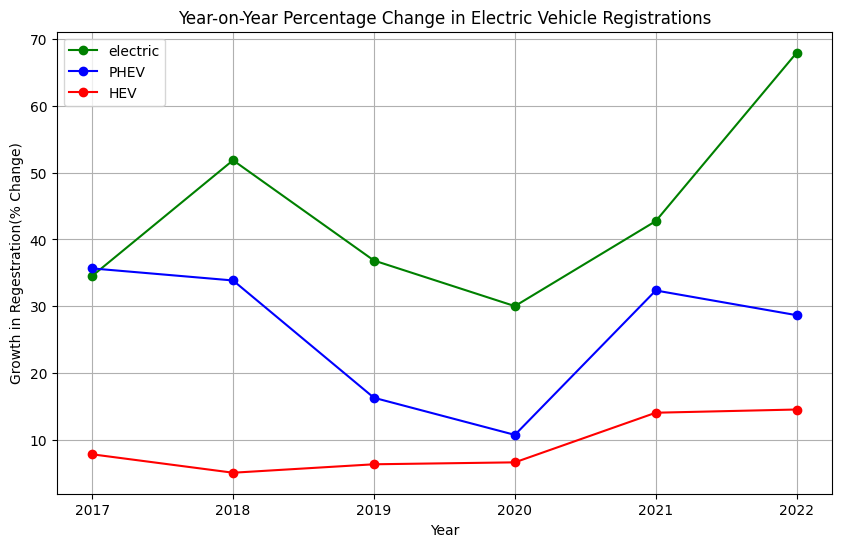

In [14]:
#calculating percent change of different types of vehicle registrations (Electric, Plug-In Hybrid Electric - PHEV, and Hybrid Electric - HEV) over the years
percentage_change_ev = np.diff(np.array(ev_sum_regis_break['Electric (EV)'])) / np.array(ev_sum_regis_break['Electric (EV)'])[:-1] * 100
percentage_change_plug_in = np.diff(np.array(ev_sum_regis_break['Plug-In Hybrid Electric (PHEV)'])) / np.array(ev_sum_regis_break['Plug-In Hybrid Electric (PHEV)'])[:-1] * 100
percentage_change_hybrid = np.diff(np.array(ev_sum_regis_break['Hybrid Electric (HEV)'])) / np.array(ev_sum_regis_break['Hybrid Electric (HEV)'])[:-1] * 100

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ev_sum_regis_break.index[1:], percentage_change_ev, marker='o', color='green',label='electric')   #selecting the index values (years) of the df ev_sum_regis_break starting from the second year (index 1) onward.
plt.plot(ev_sum_regis_break.index[1:], percentage_change_plug_in, marker='o', color='blue',label='PHEV')   #This is done to exclude the first year because the percentage change calculation involves differences between consecutive years.
plt.plot(ev_sum_regis_break.index[1:], percentage_change_hybrid, marker='o', color='red',label='HEV')

plt.xlabel('Year')
plt.ylabel('Growth in Regestration(% Change)')
plt.title('Year-on-Year Percentage Change in Electric Vehicle Registrations')
plt.grid(True)
plt.legend()
plt.show()


In [31]:
ev_price_file="../Ev Project 1/EV_Prices.csv"
ev_price_df= pd.read_csv(ev_price_file)
ev_price_df.head(20)


,Brand,Model,MSRP,Dest Chrg,Tax Credit (kWh),After Tax,Range,Type
0,Lucid,"Air Dream Edition Range 19"" (2022)","169,000","1,500","7,500","163,000",520,EV
1,Lucid,"Air Grand Touring 19"" (2022)","139,000","1,500","7,500","133,000",516,EV
2,Lucid,"Air Dream Edition Range 21"" (2022)","169,000","1,500","7,500","163,000",481,EV
3,Lucid,"Air Dream Edition Performance 19"" (202.2)","169,000","1,500","7,500","163,000",471,EV
4,Lucid,"Air Grand Touring 21"" (2022)","139,000","1,500","7,500","133,000",469,EV
5,Lucid,"Air Dream Edition Performance 21"" (2022)","169,000","1,500","7,500","163,000",451,EV
6,Tesla,"Model S LR AWD 19"" (2022)","94,990","1,200",NaN,"96,190",405,EV
7,Tesla,"Model S Plaid 19"" (2022)","129,990","1,200",NaN,"131,190",396,EV
8,Tesla,"Model S LR AWD 21"" (2022)","99,490","1,200",NaN,"100,690",375,EV
9,Tesla,"Model 3 Long Range AWD 18"" (2022)","50,990","1,200",NaN,"52,190",358,EV


In [32]:
ev_price_df= ev_price.dropna(how="all")
ev_price_df

,Brand,Model,MSRP,Dest Chrg,Tax Credit (kWh),After Tax,Range,Type
0,Lucid,"Air Dream Edition Range 19"" (2022)","169,000","1,500","7,500","163,000",520,EV
1,Lucid,"Air Grand Touring 19"" (2022)","139,000","1,500","7,500","133,000",516,EV
2,Lucid,"Air Dream Edition Range 21"" (2022)","169,000","1,500","7,500","163,000",481,EV
3,Lucid,"Air Dream Edition Performance 19"" (202.2)","169,000","1,500","7,500","163,000",471,EV
4,Lucid,"Air Grand Touring 21"" (2022)","139,000","1,500","7,500","133,000",469,EV
...,...,...,...,...,...,...,...,...
155,NaN,2018,189,335,NaN,NaN,NaN,NaN
156,NaN,2019,209,370,NaN,NaN,NaN,NaN
157,NaN,2020,210,402,NaN,NaN,NaN,NaN
158,NaN,2021,217,520,NaN,NaN,NaN,NaN


In [34]:
ev_price_df['Range'].dtype     #kept getting error.so checked the data type of "Range" column
                               #outcomr type'O' represents it has mixed data types. 

dtype('O')

In [37]:
# Decided to convert 'Range' column to numeric, coercing non-numeric values to NaN:from google
ev_price_df['Range'] = pd.to_numeric(ev_price_df['Range'], errors='coerce')

#used Groupby to calculate the mean range for each brand
brand_avg_range = ev_price_df.groupby('Brand')['Range'].mean()

# Sorted the brands in descending(high to low) order
sorted_brands = brand_avg_range.sort_values(ascending=False)

# Select the top 10 brands with the highest average range
top_10_high_range_brands = sorted_brands.head(10)
top_10_high_range_brands


C:\Users\subhab\AppData\Local\Temp\ipykernel_4836\1833718540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_price_df['Range'] = pd.to_numeric(ev_price_df['Range'], errors='coerce')


Brand
Lucid       484.666667
Mercedes    345.000000
Tesla       334.062500
GMC         329.000000
Rivian      315.000000
Cadillac    300.000000
BMW         298.333333
Kia         272.000000
Ford        267.529412
Polestar    259.500000
Name: Range, dtype: float64

In [38]:
# Converted the 'Range' column to numeric, handling errors
ev_price_df.loc[:, 'Range'] = pd.to_numeric(ev_price_data['Range'], errors='coerce')

#used Groupby to calculate the mean range for each brand
brand_avg_range = ev_price_df.groupby('Brand')['Range'].mean()

# Sort the brands  in descending order
sorted_brands = brand_avg_range.sort_values(ascending=False)

# Select the top 10 brands with the highest average range
top_10_high_range_brands = sorted_brands.head(10)
top_10_high_range_brands

Brand
Lucid       484.666667
Mercedes    345.000000
Tesla       334.062500
GMC         329.000000
Rivian      315.000000
Cadillac    300.000000
BMW         298.333333
Kia         272.000000
Ford        267.529412
Polestar    259.500000
Name: Range, dtype: float64

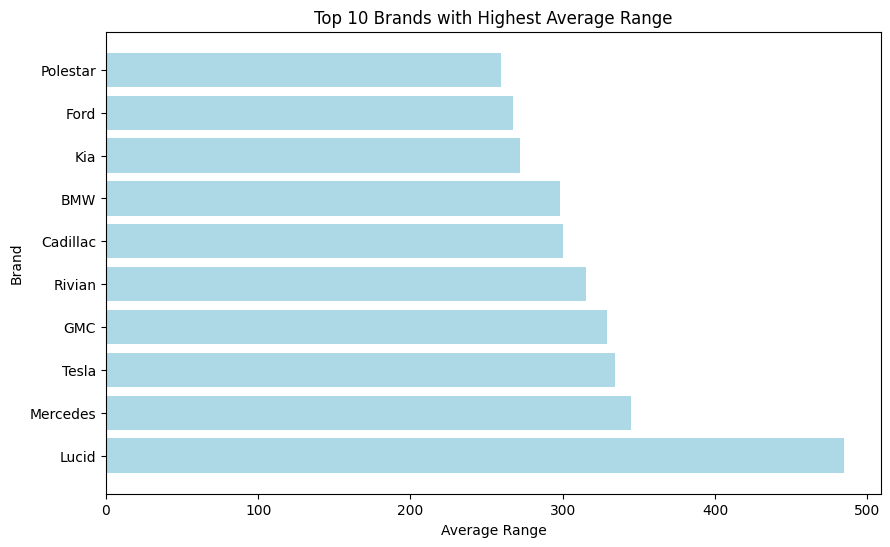

In [39]:
import matplotlib.pyplot as plt

#bar plot using plt.barh
plt.figure(figsize=(10, 6))
plt.barh(top_10_high_range_brands.index, top_10_high_range_brands.values, color='lightblue')
plt.xlabel('Average Range')
plt.ylabel('Brand')
plt.title('Top 10 Brands with Highest Average Range')

plt.show()


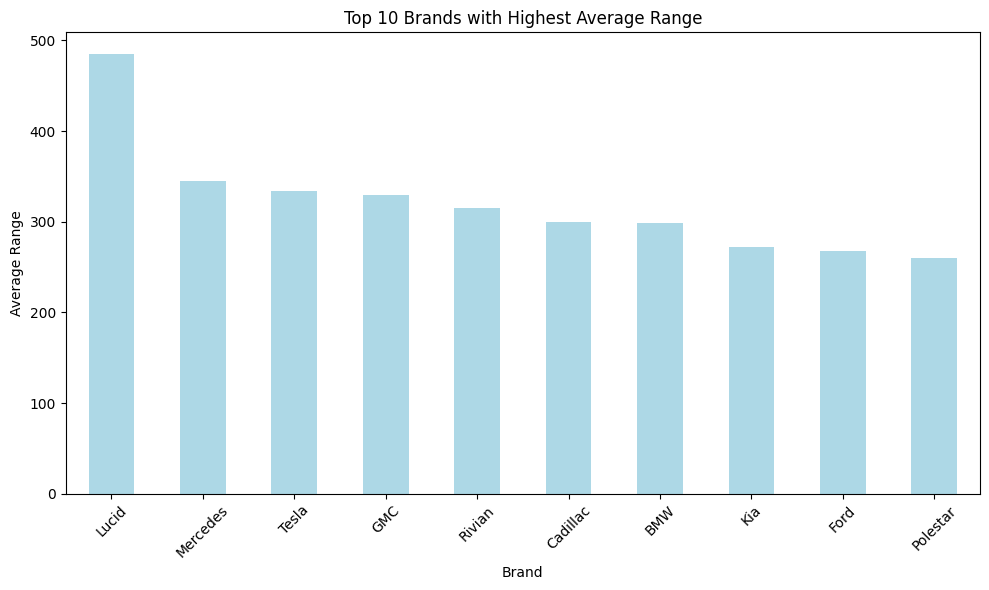

In [41]:
plt.figure(figsize=(10, 6))
top_10_high_range_brands.plot(kind='bar', color='lightblue')
plt.title('Top 10 Brands with Highest Average Range')
plt.xlabel('Brand')
plt.ylabel('Average Range')
plt.xticks(rotation=45,)
plt.tight_layout()
plt.plot(df_sorted['Brand'], df_sorted['Average Cost'], marker='o', color='red')

plt.show()